# Le sous et le sur entraînement

Les deux principaux défis que vous rencontrerez lors de votre parcours en data science sont le sous-entraînement et le sur-entraînement.

Votre modèle sera sous-entraîné s'il n'est pas assez complexe pour résoudre votre problème.

À l'inverse, un modèle sur-entraîné sera trop complexe pour votre problème. Il apprendra à mémoriser les données d'entraînement plutôt qu'à comprendre comment résoudre le problème de manière générale.

Dans ce notebook, nous explorerons des exemples de sous-entraînement et de sur-entraînement, et nous verrons comment surmonter ces problèmes.

## Problème à résoudre

Dans ce notebook on va tenter de créer un modèle capable de résoudre éfficacement le problème du jeu de données [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). Le but est de prédire à quelle classe de vêtement chaque photo appartient. Nous avons 60 000 photos pour notre entraînement et 10 000 pour notre test. Ces images sont des photos de dimension 28x28 en intensité de gris.

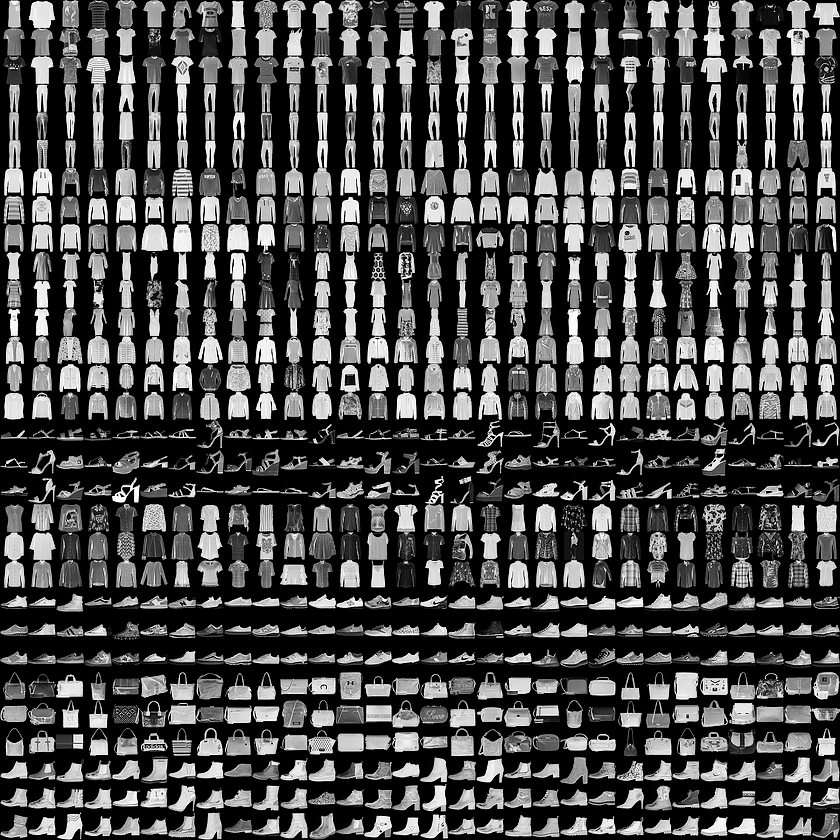

Ces photos appartiennent à 10 classes :
- les T-shirts ;
- les pantalons ;
- les pullover ;
- les robes ;
- les manteaux ;
- les sandales ;
- les chemises ;
- les baskettes ;
- les sacs ;
- les bottes.

### Importations des bibliothèques

Importez les bibliothèques dont vous allez avoir besoin dans ce notebook.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt

### Importations des données

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


### Visualisation d'une image

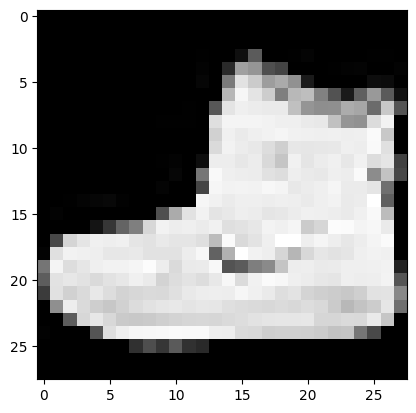

In [21]:
# Show one of the images from the training dataset
plt.imshow(x_train[0, ], cmap='Greys_r')

### Normalisez les données

In [22]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Transformez les images en vecteurs

In [23]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Transformez les variables cibles en vecteurs

In [24]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Le sous entraînement

## Initialisation de l'architecture

Initialisez un modèle avec :
- Une couche d'entrée avec 784 neurones ;
- Une couche de sortie avec 10 neurones et une fonction d'activation softmax.

In [25]:
model = Sequential([Input((784,)),
                    Dense(10, activation='softmax')])

## Compilation du modèle

Servez-vous du dernier notebook pour compiler votre modèle.

Complétez :
- loss avec la **categoricalCrossentropy**
- optimizer avec le **SGD**
- metrics avec l'**accuracy**

In [26]:
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])

## Entraînement du modèle

Servez-vous du dernier notebook pour entraîner votre modèle avec la fonction *fit*.

Utilisez :
- 5 epochs
- un batch size de 2048
- le jeu de test

In [27]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=2048)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4777 - loss: 1.6652 - val_accuracy: 0.6884 - val_loss: 0.9591
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7124 - loss: 0.8999 - val_accuracy: 0.7229 - val_loss: 0.8192
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7463 - loss: 0.7791 - val_accuracy: 0.7437 - val_loss: 0.7490
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7689 - loss: 0.7173 - val_accuracy: 0.7650 - val_loss: 0.7046
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7826 - loss: 0.6748 - val_accuracy: 0.7748 - val_loss: 0.6737


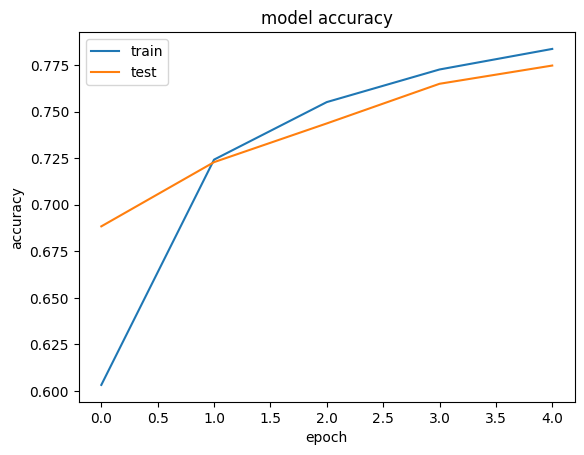

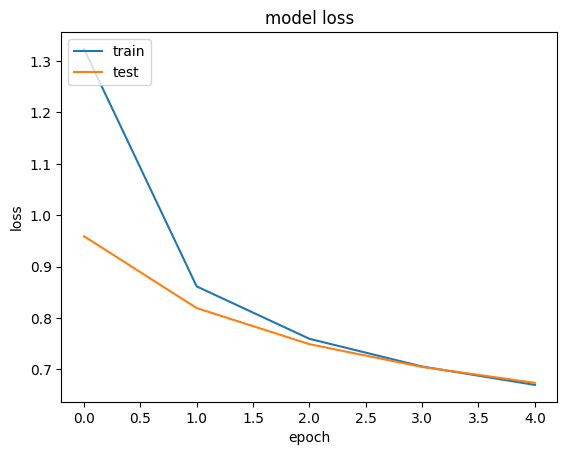

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

La loss et la performance du jeu d'entraînement et de test sont très proche les unes des autres sans être très haute. C'est de cette façon que l'on repère le sous apprentissage.

Deux options s'offre à nous :
- Augmenter la complexité du modèle,
- Continuer l'apprentissage,
- Changer le type de modèle.

**Augmentez le nombre d'epochs de votre modèle à 20**

In [29]:
#Initialisez votre modèle
model = Sequential([Input((784,)),
                    Dense(10, activation='softmax')])

# Compilez votre modèle
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])

# Entraînez votre modèle
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=2048)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4611 - loss: 1.7035 - val_accuracy: 0.6858 - val_loss: 0.9750
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7095 - loss: 0.9092 - val_accuracy: 0.7188 - val_loss: 0.8234
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7446 - loss: 0.7884 - val_accuracy: 0.7519 - val_loss: 0.7487
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7690 - loss: 0.7205 - val_accuracy: 0.7598 - val_loss: 0.7123
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7795 - loss: 0.6834 - val_accuracy: 0.7787 - val_loss: 0.6760
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.6544 - val_accuracy: 0.7842 - val_loss: 0.6546
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8001 - loss: 0.6284 - val_accuracy: 0.7888 - val_loss: 0.6377
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8012 - loss: 0.6139 - val_accuracy: 0.7930 - val_loss

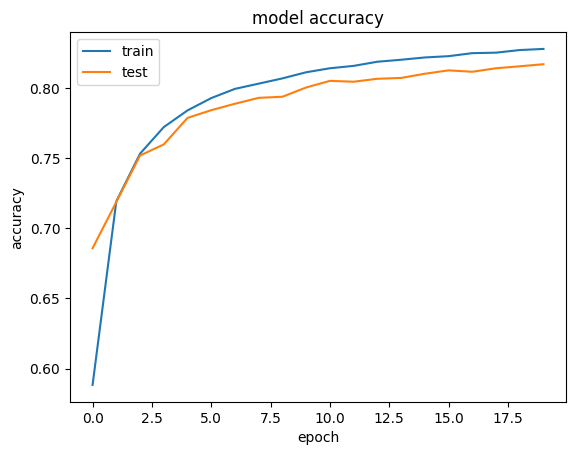

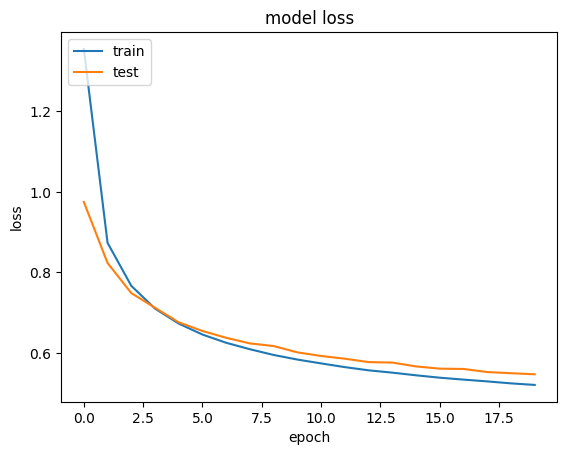

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Poursuivre l'apprentissage a permis d'améliorer la performance du modèle.

**Augmentez la complexité du modèle**

Initialisez un modèle avec :
- Une couche cachée de 128 neurones (ReLU) ;
- Une couche cachée de 64 neurones (ReLU) ;
- Une couche de sortie avec 10 neurones et une fonction d'activation softmax.

In [31]:
model = Sequential([Input((784,)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])

In [32]:
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=2048)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4379 - loss: 1.8127 - val_accuracy: 0.6542 - val_loss: 0.9931
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6881 - loss: 0.9178 - val_accuracy: 0.6852 - val_loss: 0.8836
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7384 - loss: 0.7552 - val_accuracy: 0.7741 - val_loss: 0.6571
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7837 - loss: 0.6417 - val_accuracy: 0.7284 - val_loss: 0.7422
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7738 - loss: 0.6403 - val_accuracy: 0.7847 - val_loss: 0.6034
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7880 - loss: 0.5947 - val_accuracy: 0.7977 - val_loss: 0.5740
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8147 - loss: 0.5418 - val_accuracy: 0.7974 - val_loss: 0.5588
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8026 - loss: 0.5516 - val_accuracy: 0.8019 - val_los

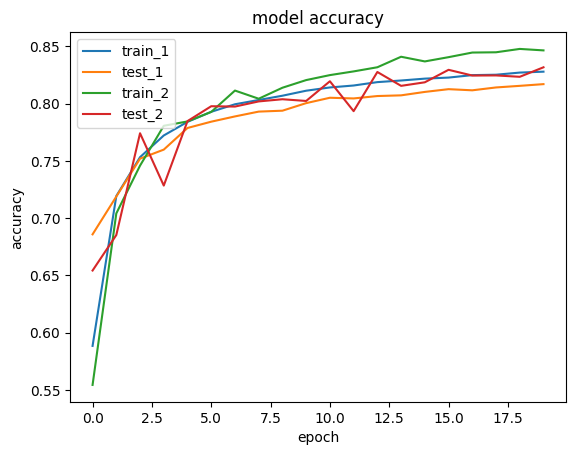

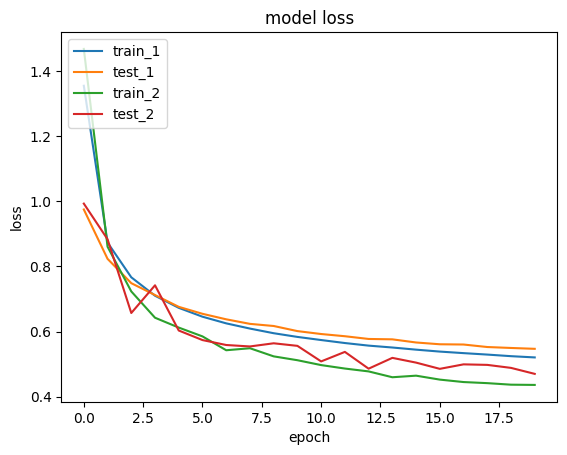

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2'], loc='upper left')
plt.show()

On peut voir que complexifier le modèle améliore les résultats du modèle.

Un autre moyen d'augmenter la performance de notre modèle serait d'utiliser une architecture spécifique aux traitements d'images comme le convolutional neural network.

# Le sur-entraînement

In [34]:
model = Sequential([Input((784,)),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])

In [35]:
history = model.fit(x_train[:5000], y_train[:5000], validation_data=(x_test, y_test), epochs=40, batch_size=32)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1387 - loss: 2.2783 - val_accuracy: 0.1983 - val_loss: 2.2246
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2154 - loss: 2.0985 - val_accuracy: 0.2770 - val_loss: 1.7101
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2991 - loss: 1.6333 - val_accuracy: 0.2512 - val_loss: 1.6570
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3543 - loss: 1.6003 - val_accuracy: 0.2108 - val_loss: 2.0227
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2169 - loss: 1.9799 - val_accuracy: 0.2929 - val_loss: 1.6930
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3176 - loss: 1.6091 - val_accuracy: 0.2664 - val_loss: 1.4426
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3596 - loss: 1.3847 - val_accuracy: 0.3431 - val_loss: 1.4700
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4373 - loss: 1.2191 - val_accuracy: 0

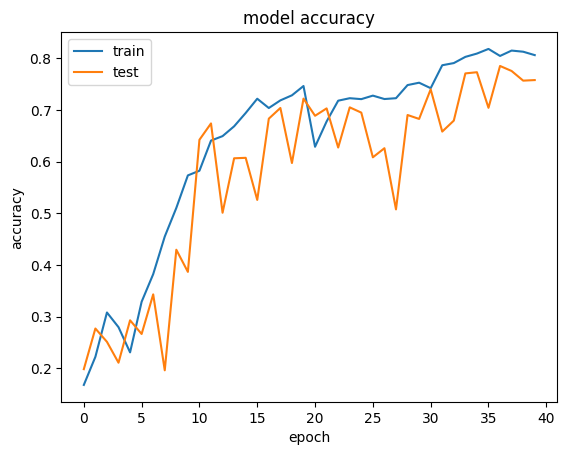

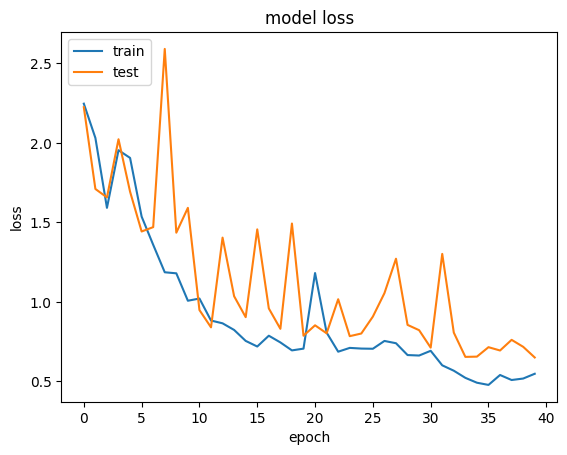

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

On voit ici une grande différence entre la performance sur le jeu d'entraînement et sur le jeu de test, c'est signe d'un sur-entraînement.

Plusieurs possibilités d'offrent à nous :
- Augmenter le nombre de données,
- Changer l'architecture du modèle,
- Simplifier l'architecture,
- Data augmentation,
- Régulariser le modèle.

## Simplifier le modèle

Initialisez un modèle avec :
- Une couche cachée de 512 neurones (ReLU) ;
- Une couche cachée de 256 neurones (ReLU) ;
- Une couche cachée de 128 neurones (ReLU) ;
- Une couche cachée de 64 neurones (ReLU) ;
- Une couche cachée de 32 neurones (ReLU) ;
- Une couche de sortie avec 10 neurones et une fonction d'activation softmax.

In [37]:
model = Sequential([Input((784,)),
                    Dense(512, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])
history2 = model.fit(x_train[:5000], y_train[:5000], validation_data=(x_test, y_test), epochs=40, batch_size=32)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4420 - loss: 1.5502 - val_accuracy: 0.6059 - val_loss: 0.9339
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7383 - loss: 0.7060 - val_accuracy: 0.6806 - val_loss: 0.9330
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7682 - loss: 0.6093 - val_accuracy: 0.7122 - val_loss: 0.9546
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7959 - loss: 0.5466 - val_accuracy: 0.7978 - val_loss: 0.5685
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8259 - loss: 0.4631 - val_accuracy: 0.7070 - val_loss: 0.6748
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8258 - loss: 0.4653 - val_accuracy: 0.5104 - val_loss: 2.3201
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8309 - loss: 0.5194 - val_accuracy: 0.6741 - val_loss: 0.9690
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8403 - loss: 0.4315 - val_accuracy: 0

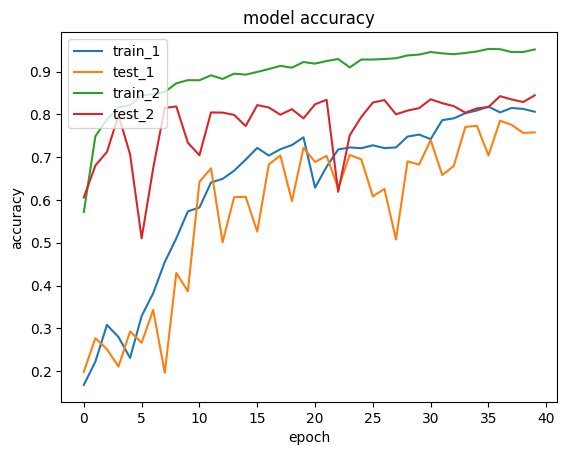

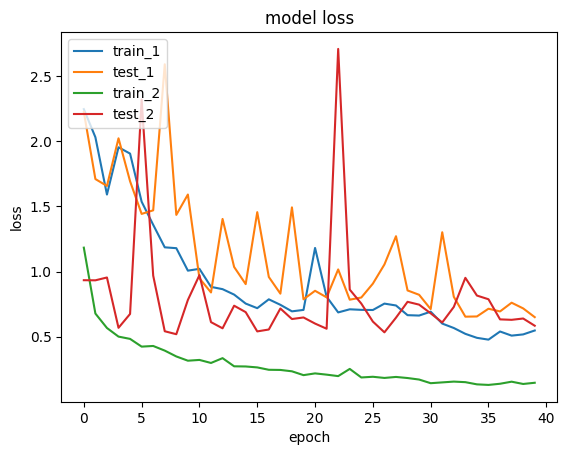

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2'], loc='upper left')
plt.show()

### Augmenter le nombre de données

Initialisez à nouveau le modèle et utilisez toutes les données disponibles.

In [39]:
model = Sequential([Input((784,)),
                    Dense(512, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])

In [40]:
history3 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7038 - loss: 0.8065 - val_accuracy: 0.8359 - val_loss: 0.4501
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8477 - loss: 0.4079 - val_accuracy: 0.8619 - val_loss: 0.3849
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.3611 - val_accuracy: 0.8646 - val_loss: 0.3777
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8789 - loss: 0.3289 - val_accuracy: 0.8667 - val_loss: 0.3696
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8866 - loss: 0.3043 - val_accuracy: 0.8678 - val_loss: 0.3592
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8897 - loss: 0.2899 - val_accuracy: 0.8694 - val_loss: 0.3662
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8955 - loss: 0.2766 - val_accuracy: 0.8760 - val_loss: 0.3441
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8990 - loss: 0.2689 - 

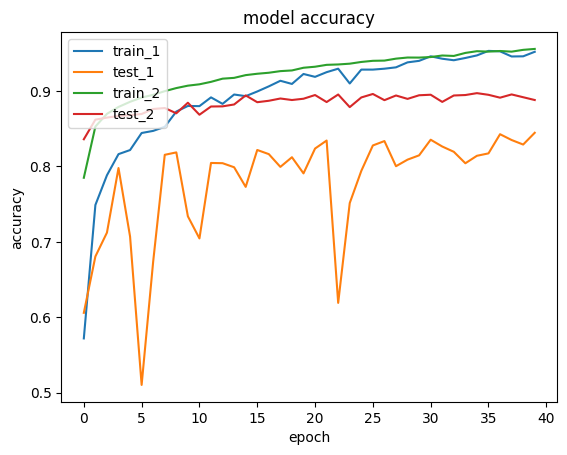

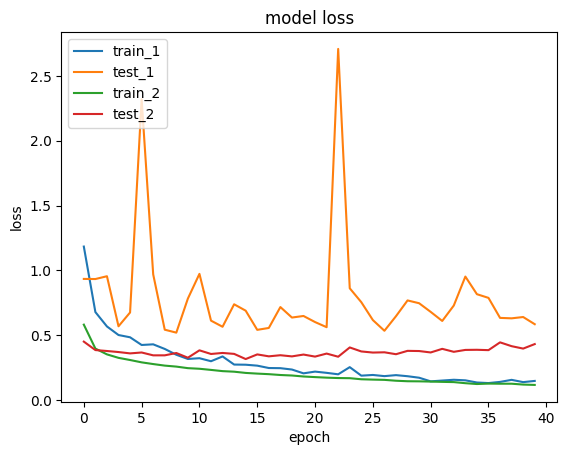

In [41]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1', 'train_2', 'test_2'], loc='upper left')
plt.show()

### Le drop out

Utilisez le drop out après chaque couche de votre modèle.

Aidez-vous de la [documentation](https://keras.io/api/layers/regularization_layers/dropout/).

In [42]:
model = Sequential([Input((784,)),
                    Dense(512, activation='relu'),
                    tf.keras.layers.Dropout(0.4),
                    Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.3),
                    Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    Dense(64, activation='relu'),
                    tf.keras.layers.Dropout(0.1),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])
model.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1), metrics=["accuracy"])

In [43]:
history4 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6378 - loss: 0.9618 - val_accuracy: 0.8301 - val_loss: 0.4776
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8062 - loss: 0.5346 - val_accuracy: 0.8428 - val_loss: 0.4400
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8332 - loss: 0.4603 - val_accuracy: 0.8494 - val_loss: 0.4107
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8414 - loss: 0.4332 - val_accuracy: 0.8544 - val_loss: 0.4094
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8487 - loss: 0.4182 - val_accuracy: 0.8339 - val_loss: 0.4474
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8558 - loss: 0.4002 - val_accuracy: 0.8630 - val_loss: 0.3804
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8612 - loss: 0.3835 - val_accuracy: 0.8641 - val_loss: 0.3703
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8633 - loss: 0.3754 - 

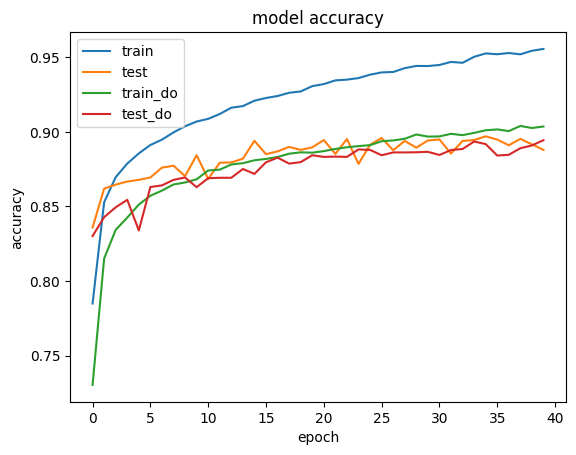

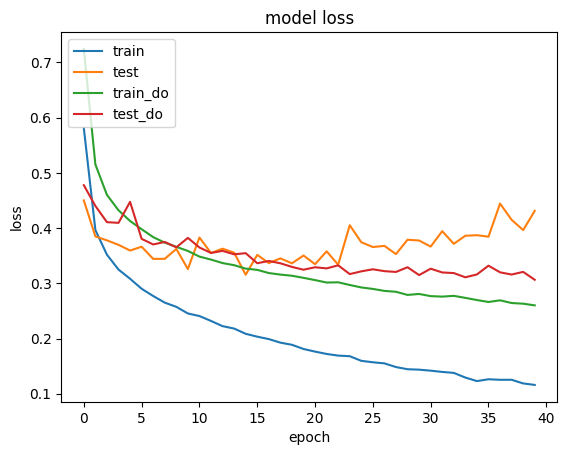

In [44]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train_do', 'test_do'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train_do', 'test_do'], loc='upper left')
plt.show()

On peut voir que l'erreur sur le jeu de test continue de descendre au lieu d'augmenter.